True

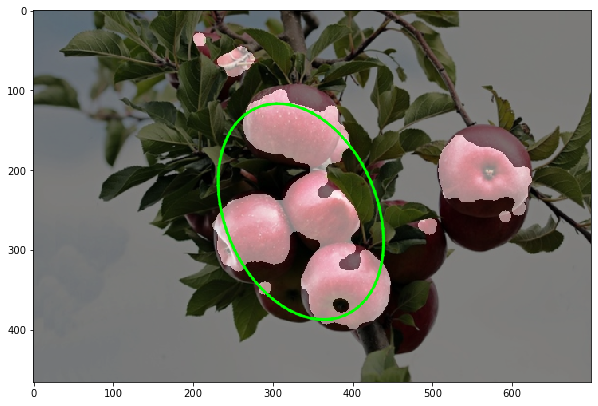

In [1]:
# Import all major libraries
from __future__ import division
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np

green = (0,255,0)

def show(image):
    # Figure size in inches
    plt.figure(figsize=(10, 10))

    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def overlay_mask(mask, image):
    #make the mask rgb
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    #calculates the weightes sum of two arrays. in our case image arrays
    #input, how much to weight each. 
    #optional depth value set to 0 no need
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    return img
    
def find_biggest_contour(image):
    # Copy
    image = image.copy()
    #input, gives all the contours, contour approximation compresses horizontal, 
    #vertical, and diagonal segments and leaves only their end points. For example, 
    #an up-right rectangular contour is encoded with 4 points.
    #Optional output vector, containing information about the image topology. 
    #It has as many elements as the number of contours.
    #we dont need it
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    # return the biggest contour
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

def circle_contour(image, contour):
    # Bounding ellipse
    image_with_ellipse = image.copy()
    #easy function
    ellipse = cv2.fitEllipse(contour)
    #add it
    cv2.ellipse(image_with_ellipse, ellipse, green, 2, cv2.LINE_AA)
    return image_with_ellipse



def find_apple(image):
    #RGB is red green blue
    #BGR is blue green res
    #Step 1 -- convert to the correct color scheme
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    # STEP 2 -- SCALE OUR IMAGE PROPERLY
    max_dimension = max(image.shape)
    scale = 700/max_dimension
    image = cv2.resize(image,None,fx=scale,fy=scale)
    
    #Step 3 -- Clean our image
    image_blur = cv2.GaussianBlur(image,(7,7),0)
    image_blur_hsv = cv2.cvtColor(image_blur,cv2.COLOR_RGB2HSV)
    
    
    #STEP 4 -- DEFINE FILTERS
    # FILTER BY THE COLOR
    min_red = np.array([0,100,80])
    max_red = np.array([10,256,256])
    
    mask1 = cv2.inRange(image_blur_hsv,min_red,max_red)
    
    #Filter by brightness 
    min_red2 = np.array([170,100,80])
    max_red2 = np.array([180,256,256])
    
    mask2 = cv2.inRange(image_blur_hsv,min_red2,max_red2)
    
    #Take these two masks and ...
    #Combine our masks
    mask = mask1 + mask2
    
    #Step5 -- Segmentation
    kernal = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
    mask_closed = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernal)
    mask_clean = cv2.morphologyEx(mask_closed,cv2.MORPH_OPEN,kernal)
    
    # Step 6 Find the biggest apple
    big_apple_contour, mask_apples = find_biggest_contour(mask_clean)
    
    #Step 7 -- overlay the masks that we created on the image
    overlay = overlay_mask(mask_clean,image)
    
    
    #Step 8 -- circle the biggest apple
    circled = circle_contour(overlay,big_apple_contour)
    
    show(circled)
     
    #Step 9 (last step) convert back to orignal color scheme
    bgr = cv2.cvtColor(circled,cv2.COLOR_RGB2BGR)
    
    return bgr
    
#read the image
image = cv2.imread('detected_apples.jpg')
#detect it
result = find_apple(image)
#write the new image
cv2.imwrite('detected_apples.jpg', result)





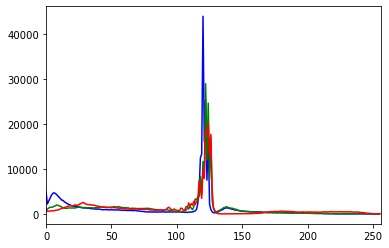

In [2]:
img = cv2.imread('detected_apples.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
     histr = cv2.calcHist([img],[i],None,[256],[0,256])
     plt.plot(histr,color = col)
     plt.xlim([0,256])
plt.show()

In [6]:
from matplotlib.pyplot import imread
def picture_to_arr(image):
    arr = imread(image)
    arr_list=arr.tolist()
    r=g=b=0
    for row in arr_list:
        for item in row:
            r=r+item[0]
            g=g+item[1]
            b=b+item[2]  
    total=r+g+b
    red=r/total*100
    green=g/total*100
    blue=b/total*100
    print ("the percentage of red content=",red,"%")
    print ("the percentage of green content=",green,"%")
    print ("the percentage of blue content=",blue,"%")


picture_to_arr('detected_apples.jpg')

the percentage of red content= 35.370989469267634 %
the percentage of green content= 33.79405454610867 %
the percentage of blue content= 30.8349559846237 %


# the percentage of red content= 35.370989469267634 %